<h1 style="color:Tomato;"><center>ONE OF THE GREATEST MARKETING CAMPAIGNS OF MODERN TIMES</center></h1> 

<img src="img/1.jpg">

![Ghana Flag](img/1.gif)


In [138]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
import nltk
import gensim
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from textblob import TextBlob

In [183]:
df = pd.read_csv('tweet.csv')

In [184]:
df.head()

Unnamed: 0   screen_name         timestamp  \
0           0   ShulesHersh    1/6/2012 16:25   
1           1     choruslid  12/27/2011 15:25   
2           2   ShulesHersh    1/6/2012 16:25   
3           3     choruslid  12/27/2011 15:25   
4           4  chrisdutruch     1/7/2016 0:31   

                                                text  \
0  I will restore health unto thee...and...heal t...   
1  If you have a moment why not listen to my song...   
2  I will restore health unto thee...and...heal t...   
3  If you have a moment why not listen to my song...   
4  Greater Grace! #james4:6 #yearofreturn #unlock...   

                                            hashtags  has_media  likes  \
0                           ['2012', 'YearOfReturn']      False      1   
1                                   ['YearofReturn']      False      1   
2                           ['2012', 'YearOfReturn']      False      1   
3                                   ['YearofReturn']      False      1   
4  ['james4', 'yearofreturn', 'unlockdestiny', 'p...      False      0   

   retweets  replies  
0         0        0  
1         0        0  
2         0        0  
3         0        0  
4         0        0

In [185]:
df.describe()

Unnamed: 0         likes      retweets       replies
count  18583.000000  18583.000000  18583.000000  18583.000000
mean    9291.000000     16.822903      3.563902      0.554539
std     5364.594362    128.082052     22.339235      9.718092
min        0.000000      0.000000      0.000000      0.000000
25%     4645.500000      0.000000      0.000000      0.000000
50%     9291.000000      2.000000      0.000000      0.000000
75%    13936.500000      5.000000      2.000000      0.000000
max    18582.000000   6251.000000   1446.000000   1106.000000

In [186]:
df.sum()

Unnamed: 0                                             172654653
screen_name    ShulesHershchoruslidShulesHershchoruslidchrisd...
timestamp      1/6/2012 16:2512/27/2011 15:251/6/2012 16:2512...
hashtags       ['2012', 'YearOfReturn']['YearofReturn']['2012...
has_media                                                   7008
likes                                                     312620
retweets                                                   66228
replies                                                    10305
dtype: object

In [187]:
df['likes'].sum()

312620

In [188]:
df['retweets'].sum()

66228

In [189]:
df['replies'].sum()

10305

In [190]:
words = df.text.tolist()

![Ghana Flag](img/2.gif)


In [191]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'com','the ','www','the','you','an','via','it','in','are','let','subject','to', 'they','re', 'edu', 'use', 'the','https', 'will', 'thee', 'one', 'an', 'really', 'even', 'take','lot', 'nan','take','want' 'take',])

In [192]:
def sent_to_words(words):
    for sentence in words:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  

In [193]:
data_words = list(sent_to_words(words))
print(data_words[:1])

[['will', 'restore', 'health', 'unto', 'thee', 'and', 'heal', 'thee', 'of', 'thy', 'wounds', 'because', 'they', 'called', 'thee', 'an', 'outcast', 'jer', 'yearofreturn']]


In [194]:
list_words = []
for i in data_words:
    for j in i:
        list_words.append(j)

In [195]:
print(len(list_words))

415424


In [196]:
count_each_word = Counter(list_words)
print(count_each_word.most_common(100))

[('yearofreturn', 19404), ('com', 12904), ('the', 11369), ('twitter', 9442), ('to', 7655), ('ghana', 7577), ('https', 5290), ('and', 5247), ('of', 4946), ('for', 4534), ('you', 4521), ('in', 4276), ('is', 3860), ('pic', 3557), ('this', 3528), ('we', 2745), ('on', 2677), ('www', 2496), ('sarkodie', 2472), ('be', 2385), ('it', 2373), ('status', 2245), ('at', 2046), ('with', 1983), ('your', 1975), ('are', 1802), ('accra', 1742), ('our', 1707), ('africa', 1520), ('year', 1496), ('all', 1491), ('instagram', 1444), ('igshid', 1365), ('from', 1183), ('december', 1168), ('us', 1072), ('return', 1061), ('that', 1039), ('will', 1022), ('have', 1015), ('by', 967), ('as', 929), ('http', 917), ('my', 914), ('come', 868), ('go', 828), ('so', 822), ('can', 805), ('get', 799), ('an', 788), ('no', 775), ('me', 764), ('what', 740), ('more', 729), ('or', 727), ('if', 718), ('do', 718), ('just', 707), ('now', 671), ('today', 670), ('rt', 666), ('out', 663), ('coming', 650), ('like', 640), ('people', 634),

In [197]:
for token in list_words:
    if token in stop_words:
         list_words.remove(token)

In [198]:
len(list_words)

315484

In [199]:
freq = nltk.FreqDist(list_words)

In [200]:
freq

FreqDist({'yearofreturn': 19404, 'twitter': 9442, 'ghana': 7577, 'the': 5951, 'pic': 3557, 'sarkodie': 2472, 'status': 2245, 'www': 1836, 'accra': 1742, 'you': 1701, ...})

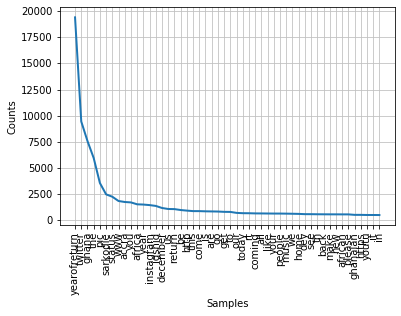

In [201]:
freq.plot(50, cumulative=False)

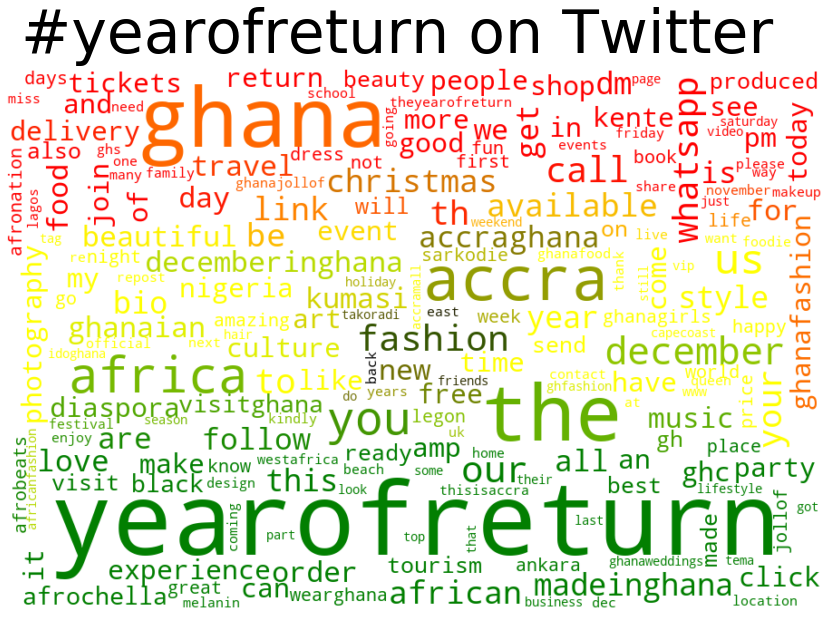

In [159]:
mask = np.array(Image.open("./1.jpg"))
wordcloud = WordCloud(background_color="white", mode="RGBA", mask=mask).generate_from_frequencies(word_could_dict)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,10])
plt.figtext(.5,.9,"#yearofreturn on Twitter",  fontsize=60, ha='center', color='black')
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.show()

In [202]:
df['text'] = df['text'].astype(str)

df['Sentiment Analysis'] = df['text'].apply(lambda tweet: 'positive' if TextBlob(tweet).sentiment.polarity > 0  else ('neutral' if TextBlob(tweet).sentiment.polarity == 0 else 'negative'))

In [203]:
df.head()

Unnamed: 0   screen_name         timestamp  \
0           0   ShulesHersh    1/6/2012 16:25   
1           1     choruslid  12/27/2011 15:25   
2           2   ShulesHersh    1/6/2012 16:25   
3           3     choruslid  12/27/2011 15:25   
4           4  chrisdutruch     1/7/2016 0:31   

                                                text  \
0  I will restore health unto thee...and...heal t...   
1  If you have a moment why not listen to my song...   
2  I will restore health unto thee...and...heal t...   
3  If you have a moment why not listen to my song...   
4  Greater Grace! #james4:6 #yearofreturn #unlock...   

                                            hashtags  has_media  likes  \
0                           ['2012', 'YearOfReturn']      False      1   
1                                   ['YearofReturn']      False      1   
2                           ['2012', 'YearOfReturn']      False      1   
3                                   ['YearofReturn']      False      1   
4  ['james4', 'yearofreturn', 'unlockdestiny', 'p...      False      0   

   retweets  replies Sentiment Analysis  
0         0        0            neutral  
1         0        0            neutral  
2         0        0            neutral  
3         0        0            neutral  
4         0        0           positive

In [60]:
df.groupby('Sentiment Analysis').count()

Unnamed: 0  screen_name  timestamp  text  hashtags  \
Sentiment Analysis                                                       
negative                  1499         1499       1499  1499      1499   
neutral                   9510         9510       9510  9510      9510   
positive                  7574         7574       7574  7574      7574   

                    has_media  likes  retweets  replies  
Sentiment Analysis                                       
negative                 1499   1499      1499     1499  
neutral                  9510   9510      9510     9510  
positive                 7574   7574      7574     7574

In [63]:
df2 = df.groupby('has_media').sum()
df2

Unnamed: 0   likes  retweets  replies
has_media                                       
False       104304686  187346     33599     5935
True         68349967  125274     32629     4370

![Ghana Flag](img/5.gif)

In [65]:
df.groupby('has_media').count()

Unnamed: 0  screen_name  timestamp   text  hashtags  likes  \
has_media                                                               
False           11575        11575      11575  11575     11575  11575   
True             7008         7008       7008   7008      7008   7008   

           retweets  replies  Sentiment Analysis  
has_media                                         
False         11575    11575               11575  
True           7008     7008                7008

![Ghana Flag](img/3.gif)


In [71]:
df1 = pd.read_csv('tweet1.csv')

In [72]:
df1.head()

Unnamed: 0      screen_name        timestamp  \
0           0    ForumDiaspora   3/27/2019 8:26   
1           1           adri16   3/3/2019 22:04   
2           2  iarrcrelocation  2/25/2019 18:56   
3           3  iarrcrelocation  2/24/2019 11:01   
4           4  iarrcrelocation  2/12/2019 21:55   

                                                text  \
0  The Diaspora African Forum is revved up for #Y...   
1  The Nkyinkyim Za Festival, Ghana seeks creator...   
2  AFRICAN CREATIVITY!\n\n#africatotheworld #afri...   
3  Splendid Ghana in all her glory!\n#africatothe...   
4  Kiira EV Smack car manufactured in Uganda\n\n#...   

                                            hashtags  has_media  likes  \
0  ['YearofReturn', 'GhanaYearofReturn', 'Diaspor...      False      0   
1                     ['Ghana', 'GhanaYearofReturn']       True      7   
2  ['africatotheworld', 'africa', 'travelersnoteb...      False      0   
3  ['africatotheworld', 'africa', 'travelersnoteb...      False      0   
4  ['africatotheworld', 'africa', 'travelersnoteb...      False      0   

   retweets  replies  
0         0        0  
1         3        1  
2         0        0  
3         0        0  
4         0        0

In [74]:
df1.describe()

Unnamed: 0      likes  retweets    replies
count   60.000000  60.000000  60.00000  60.000000
mean    29.500000   3.816667   0.85000   0.566667
std     17.464249  10.677859   2.07344   1.720925
min      0.000000   0.000000   0.00000   0.000000
25%     14.750000   0.000000   0.00000   0.000000
50%     29.500000   0.000000   0.00000   0.000000
75%     44.250000   1.250000   1.00000   0.000000
max     59.000000  47.000000   9.00000   9.000000

In [75]:
df1.sum()

Unnamed: 0                                                  1770
screen_name    ForumDiasporaadri16iarrcrelocationiarrcrelocat...
timestamp      3/27/2019 8:263/3/2019 22:042/25/2019 18:562/2...
text           The Diaspora African Forum is revved up for #Y...
hashtags       ['YearofReturn', 'GhanaYearofReturn', 'Diaspor...
has_media                                                     19
likes                                                        229
retweets                                                      51
replies                                                       34
dtype: object

In [163]:
df1['text'] = df1['text'].astype(str)

df1['Sentiment Analysis'] = df1['text'].apply(lambda tweet: 'positive' if TextBlob(tweet).sentiment.polarity > 0  else ('neutral' if TextBlob(tweet).sentiment.polarity == 0 else 'negative'))

In [164]:
df1.head()

Unnamed: 0      screen_name        timestamp  \
0           0    ForumDiaspora   3/27/2019 8:26   
1           1           adri16   3/3/2019 22:04   
2           2  iarrcrelocation  2/25/2019 18:56   
3           3  iarrcrelocation  2/24/2019 11:01   
4           4  iarrcrelocation  2/12/2019 21:55   

                                                text  \
0  The Diaspora African Forum is revved up for #Y...   
1  The Nkyinkyim Za Festival, Ghana seeks creator...   
2  AFRICAN CREATIVITY!\n\n#africatotheworld #afri...   
3  Splendid Ghana in all her glory!\n#africatothe...   
4  Kiira EV Smack car manufactured in Uganda\n\n#...   

                                            hashtags  has_media  likes  \
0  ['YearofReturn', 'GhanaYearofReturn', 'Diaspor...      False      0   
1                     ['Ghana', 'GhanaYearofReturn']       True      7   
2  ['africatotheworld', 'africa', 'travelersnoteb...      False      0   
3  ['africatotheworld', 'africa', 'travelersnoteb...      False      0   
4  ['africatotheworld', 'africa', 'travelersnoteb...      False      0   

   retweets  replies Sentiment Analysis  
0         0        0            neutral  
1         3        1           positive  
2         0        0            neutral  
3         0        0           positive  
4         0        0            neutral

In [165]:
df1.groupby('Sentiment Analysis').count()

Unnamed: 0  screen_name  timestamp  text  hashtags  \
Sentiment Analysis                                                       
negative                     6            6          6     6         6   
neutral                     33           33         33    33        33   
positive                    21           21         21    21        21   

                    has_media  likes  retweets  replies  
Sentiment Analysis                                       
negative                    6      6         6        6  
neutral                    33     33        33       33  
positive                   21     21        21       21

In [76]:
words1 = df1.text.tolist()

In [93]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'com','the ','www','the','you','an','via','it','in','are','let','subject','to', 'they','re', 'edu', 'use', 'the','https', 'will', 'thee', 'one', 'an', 'really', 'even', 'take','lot', 'nan','take','want' 'take',])

In [79]:
def sent_to_words(words1):
    for sentence in words1:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  

![Ghana Flag](img/1.gif)


In [80]:
data_words1 = list(sent_to_words(words1))
print(data_words1[:1])

[['the', 'diaspora', 'african', 'forum', 'is', 'revved', 'up', 'for', 'yearofreturn', 'get', 'interactive', 'with', 'us', 'you', 'can', 'also', 'visit', 'our', 'website', 'http', 'www', 'org', 'for', 'all', 'the', 'updates', 'africanunion', 'africa']]


In [81]:
list_words1 = []
for i in data_words1:
    for j in i:
        list_words1.append(j)

In [168]:
print(len(list_words1))

968


In [95]:
for token in list_words1:
    if token in stop_words:
         list_words1.remove(token)

In [88]:
freq = nltk.FreqDist(list_words1)

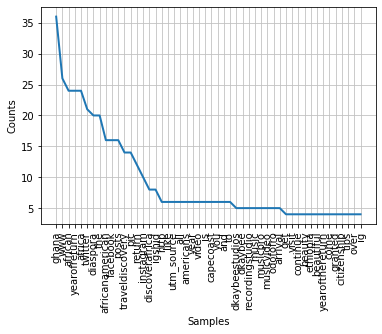

In [89]:
freq.plot(50, cumulative=False)

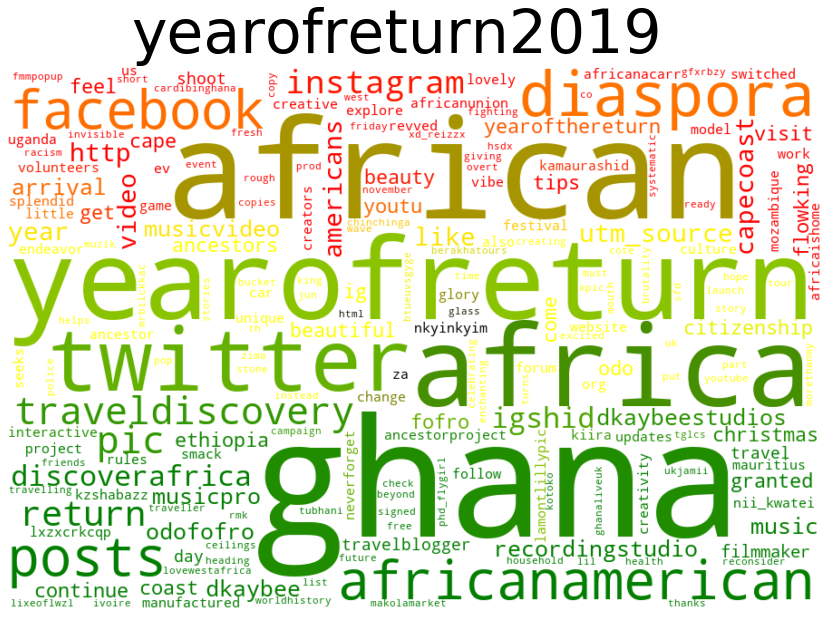

In [166]:
word_could_dict=Counter(list_words1)
wordcloud = WordCloud(background_color="white", mode="RGBA", mask=mask).generate_from_frequencies(word_could_dict)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,10])
plt.figtext(.5,.9,"yearofreturn2019",  fontsize=60, ha='center', color='black')
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.show()

In [106]:
df2 = pd.read_csv('tweet3.csv')

In [107]:
df2.head()

Unnamed: 0   screen_name        timestamp  \
0           0    qwesihonny  3/19/2019 17:31   
1           1   girl_nomads   3/6/2019 13:26   
2           2      silburne  1/28/2019 20:08   
3           3  staksottieGH   1/9/2019 14:41   
4           4  EkowSimpson1   1/7/2019 16:58   

                                                text  \
0  Such a good sight of nature to behold. A great...   
1  Happy 62nd Independence Day to my home country...   
2  #2019yearofreturn #Ghana #africanyouth #asante...   
3  Good Afternoon @FelixRomark & @jamessowah\n#Ea...   
4  At a point, I realized that ONLY person I can ...   

                                            hashtags  has_media  likes  \
0  ['2019yearofreturn', 'kakumnationalpark', 'GHA...      False      0   
1  ['Ghana', '2019yearofreturn', 'GhanaAt62', 'kw...       True      3   
2  ['2019yearofreturn', 'Ghana', 'africanyouth', ...       True      2   
3     ['EatGhana', 'VisitGhana', '2019YearOfReturn']       True      0   
4  ['findcapecoast', 'capecoast', 'africa', 'cape...       True      6   

   retweets  replies  
0         0        0  
1         1        0  
2         2        0  
3         0        2  
4         1        1

In [108]:
df2.sum()

Unnamed: 0                                                  2926
screen_name    qwesihonnygirl_nomadssilburnestaksottieGHEkowS...
timestamp      3/19/2019 17:313/6/2019 13:261/28/2019 20:081/...
text           Such a good sight of nature to behold. A great...
hashtags       ['2019yearofreturn', 'kakumnationalpark', 'GHA...
has_media                                                     42
likes                                                        335
retweets                                                      37
replies                                                       23
dtype: object

In [109]:
df2.describe()

Unnamed: 0      likes   retweets    replies
count   77.000000  77.000000  77.000000  77.000000
mean    38.000000   4.350649   0.480519   0.298701
std     22.371857   9.518357   0.926374   0.726653
min      0.000000   0.000000   0.000000   0.000000
25%     19.000000   0.000000   0.000000   0.000000
50%     38.000000   2.000000   0.000000   0.000000
75%     57.000000   3.000000   1.000000   0.000000
max     76.000000  50.000000   4.000000   3.000000

In [169]:
df2['text'] = df2['text'].astype(str)

df2['Sentiment Analysis'] = df2['text'].apply(lambda tweet: 'positive' if TextBlob(tweet).sentiment.polarity > 0  else ('neutral' if TextBlob(tweet).sentiment.polarity == 0 else 'negative'))

In [170]:
df2.head()

Unnamed: 0   screen_name        timestamp  \
0           0    qwesihonny  3/19/2019 17:31   
1           1   girl_nomads   3/6/2019 13:26   
2           2      silburne  1/28/2019 20:08   
3           3  staksottieGH   1/9/2019 14:41   
4           4  EkowSimpson1   1/7/2019 16:58   

                                                text  \
0  Such a good sight of nature to behold. A great...   
1  Happy 62nd Independence Day to my home country...   
2  #2019yearofreturn #Ghana #africanyouth #asante...   
3  Good Afternoon @FelixRomark & @jamessowah\n#Ea...   
4  At a point, I realized that ONLY person I can ...   

                                            hashtags  has_media  likes  \
0  ['2019yearofreturn', 'kakumnationalpark', 'GHA...      False      0   
1  ['Ghana', '2019yearofreturn', 'GhanaAt62', 'kw...       True      3   
2  ['2019yearofreturn', 'Ghana', 'africanyouth', ...       True      2   
3     ['EatGhana', 'VisitGhana', '2019YearOfReturn']       True      0   
4  ['findcapecoast', 'capecoast', 'africa', 'cape...       True      6   

   retweets  replies Sentiment Analysis  
0         0        0           positive  
1         1        0           positive  
2         2        0            neutral  
3         0        2           positive  
4         1        1           positive

In [110]:
words2 = df2.text.tolist()

In [171]:
df2.groupby('Sentiment Analysis').count()

Unnamed: 0  screen_name  timestamp  text  hashtags  \
Sentiment Analysis                                                       
negative                     9            9          9     9         9   
neutral                     40           40         40    40        40   
positive                    28           28         28    28        28   

                    has_media  likes  retweets  replies  
Sentiment Analysis                                       
negative                    9      9         9        9  
neutral                    40     40        40       40  
positive                   28     28        28       28

In [112]:
data_words2 = list(sent_to_words(words2))
print(data_words2[:1])

[['such', 'good', 'sight', 'of', 'nature', 'to', 'behold', 'great', 'adventure', 'on', 'the', 'canopy', 'walk', 'and', 'the', 'hike', 'into', 'the', 'forest', 'reserve', 'so', 'refreshing', 'yearofreturn', 'ghana']]


In [113]:
list_words2 = []
for i in data_words2:
    for j in i:
        list_words2.append(j)

In [114]:
for token in list_words2:
    if token in stop_words:
         list_words2.remove(token)

In [115]:
freq = nltk.FreqDist(list_words2)

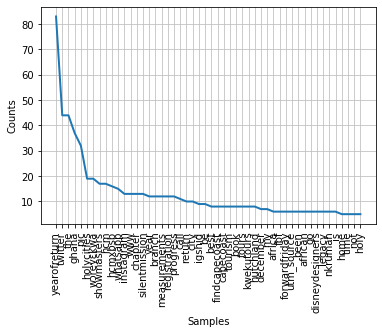

In [116]:
freq.plot(50, cumulative=False)

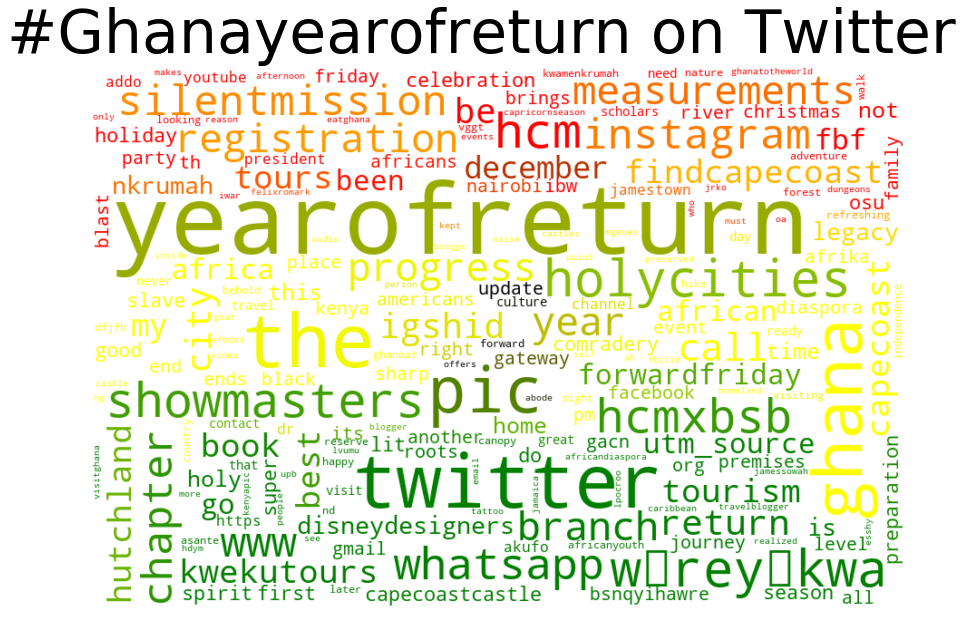

In [172]:
word_could_dict=Counter(list_words2)
wordcloud = WordCloud(background_color="white", mode="RGBA", mask=mask).generate_from_frequencies(word_could_dict)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,10])
plt.figtext(.5,.9,"#Ghanayearofreturn on Twitter",  fontsize=60, ha='center', color='black')
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.show()

In [119]:
df3 = pd.read_csv('insta1.csv')

In [120]:
df3

username  commentCount  likeCount                   pubDate  \
0             deijhasviews          15.0      611.0  2019-12-12T00:49:28.000Z   
1             hashtagghana           3.0     1053.0  2019-12-10T09:04:20.000Z   
2             deijhasviews          26.0      751.0  2019-12-11T20:36:25.000Z   
3               ghana.made          17.0     1209.0  2019-12-10T15:54:22.000Z   
4      travelingcocoagirls           9.0      635.0  2019-12-10T18:30:26.000Z   
...                    ...           ...        ...                       ...   
27134                  NaN           NaN       22.0  2019-01-30T11:10:30.000Z   
27135                  NaN           NaN       46.0  2019-01-16T10:26:50.000Z   
27136                  NaN           1.0       39.0  2019-01-15T19:25:36.000Z   
27137                  NaN           2.0      107.0  2019-01-15T08:24:16.000Z   
27138                  NaN           4.0       21.0  2018-10-29T23:31:45.000Z   

                                             description  \
0      Done Saying I’m Done Playing! My Time Is Now !...   
1      #hashtagghana 🇬🇭\n.\n.\n..\n. .\n.\n.\n.\n.\n\...   
2      Ghana Got Ya Girl Out Here Glowin n What Not 🤩 🇬🇭   
3      It’s a beautiful time as many are preparing to...   
4      YEAR OF RETURN // Ghana 🇬🇭 We are overjoyed th...   
...                                                  ...   
27134  Knowledge of African Currency by country is ke...   
27135  More happy images from the star studded #MadeI...   
27136  We love this vlog of the #MadeInGhanaevent by ...   
27137  How our year ended last year set the tone for ...   
27138  @Regran_ed from @afrivue -  Ghana Offers Afric...   

                           location               query   type  viewCount  
0                       Coco Lounge       #yearofreturn  Photo        NaN  
1                               NaN       #yearofreturn  Photo        NaN  
2      Kotoka International Airport       #yearofreturn  Photo        NaN  
3                      Accra, Ghana       #yearofreturn  Photo        NaN  
4                      Accra, Ghana       #yearofreturn  Photo        NaN  
...                             ...                 ...    ...        ...  
27134                           NaN  #ghanayearofreturn    NaN        NaN  
27135                           NaN  #ghanayearofreturn    NaN        NaN  
27136                           NaN  #ghanayearofreturn    NaN        NaN  
27137                           NaN  #ghanayearofreturn    NaN        NaN  
27138                           NaN  #ghanayearofreturn    NaN        NaN  

[27139 rows x 9 columns]

In [121]:
df3.describe()

commentCount     likeCount      viewCount
count  12447.000000  26990.000000    2325.000000
mean       8.074797    139.403705    1130.828817
std       25.987638    741.820037    5301.160005
min        1.000000      1.000000       1.000000
25%        1.000000     13.000000      69.000000
50%        2.000000     28.000000     164.000000
75%        6.000000     71.000000     497.000000
max      845.000000  46900.000000  174097.000000

![Ghana Flag](img/4.gif)


In [122]:
df3.sum()

commentCount     100507.0
likeCount       3762506.0
viewCount       2629177.0
dtype: float64

In [174]:
df3['description'] = df3['description'].astype(str)

df3['Sentiment Analysis'] = df3['description'].apply(lambda tweet: 'positive' if TextBlob(tweet).sentiment.polarity > 0  else ('neutral' if TextBlob(tweet).sentiment.polarity == 0 else 'negative'))

In [175]:
df3.head()

username  commentCount  likeCount                   pubDate  \
0         deijhasviews          15.0      611.0  2019-12-12T00:49:28.000Z   
1         hashtagghana           3.0     1053.0  2019-12-10T09:04:20.000Z   
2         deijhasviews          26.0      751.0  2019-12-11T20:36:25.000Z   
3           ghana.made          17.0     1209.0  2019-12-10T15:54:22.000Z   
4  travelingcocoagirls           9.0      635.0  2019-12-10T18:30:26.000Z   

                                         description  \
0  Done Saying I’m Done Playing! My Time Is Now !...   
1  #hashtagghana 🇬🇭\n.\n.\n..\n. .\n.\n.\n.\n.\n\...   
2  Ghana Got Ya Girl Out Here Glowin n What Not 🤩 🇬🇭   
3  It’s a beautiful time as many are preparing to...   
4  YEAR OF RETURN // Ghana 🇬🇭 We are overjoyed th...   

                       location          query   type  viewCount  \
0                   Coco Lounge  #yearofreturn  Photo        NaN   
1                           NaN  #yearofreturn  Photo        NaN   
2  Kotoka International Airport  #yearofreturn  Photo        NaN   
3                  Accra, Ghana  #yearofreturn  Photo        NaN   
4                  Accra, Ghana  #yearofreturn  Photo        NaN   

  Sentiment Analysis  
0            neutral  
1            neutral  
2            neutral  
3           positive  
4           positive

In [176]:
df3.groupby('Sentiment Analysis').count()

username  commentCount  likeCount  pubDate  description  \
Sentiment Analysis                                                            
negative                 680           782       1615     1624         1624   
neutral                 3191          3417       7551     7590         7590   
positive                7369          8248      17824    17925        17925   

                    location  query  type  viewCount  
Sentiment Analysis                                    
negative                 227   1624   680        166  
neutral                 1125   7590  3191        723  
positive                2630  17925  7369       1436

In [124]:
words3 = df3.description.tolist()

In [125]:
data_words3 = list(sent_to_words(words3))
print(data_words3[:1])

[['done', 'saying', 'done', 'playing', 'my', 'time', 'is', 'now']]


In [126]:
list_words3 = []
for i in data_words3:
    for j in i:
        list_words3.append(j)

In [127]:
for token in list_words3:
    if token in stop_words:
         list_words3.remove(token)

In [132]:
freq = nltk.FreqDist(list_words3)

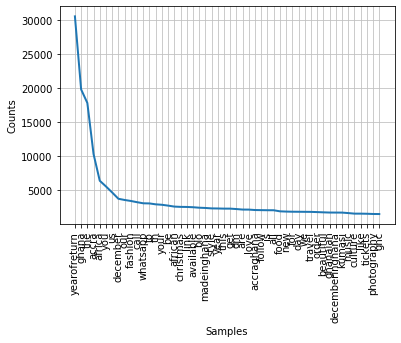

In [133]:
freq.plot(50, cumulative=False)

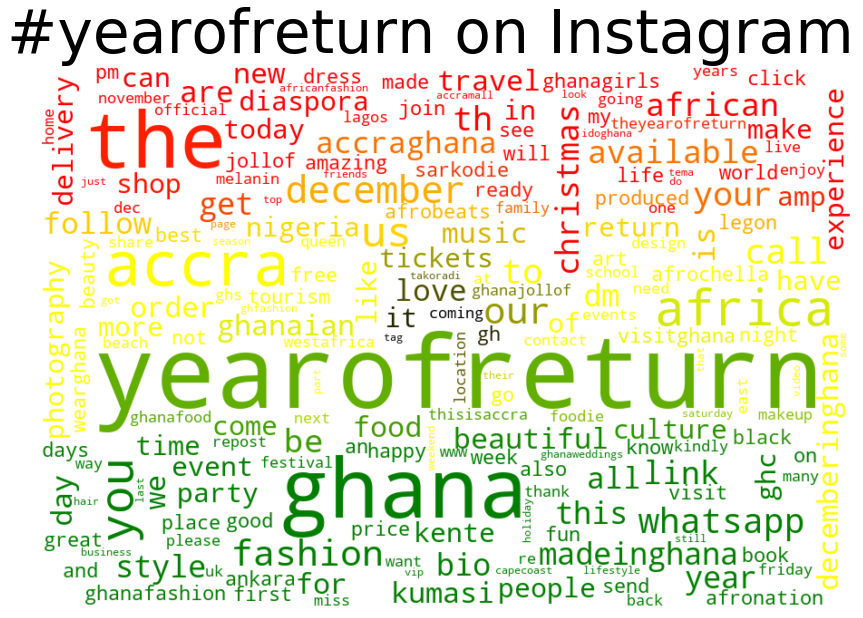

In [135]:
word_could_dict=Counter(list_words3)
wordcloud = WordCloud(background_color="white", mode="RGBA", mask=mask).generate_from_frequencies(word_could_dict)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,10])
plt.figtext(.5,.9,"#yearofreturn on Instagram",  fontsize=60, ha='center', color='black')
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.show()

<img src="img/2.jpg">

<h1 ><center> STATS </center></h1>

<h1 style="color:red;">#yearofreturn ON TWITTER</h1>

<h2> Number of Tweets: 18,583</h2>

<h2> Number of Tweets with Media: 7,008</h2>

<h2> Number of Likes: 312,620</h2>

<h2> Number of Retweets: 66,228</h2>

<h2> Number of Replies: 10,305 </h2>

<h2> Number of Words: 415,424<h1>

<h1 style="color:blue;">Sentiment Analysis of #yearofreturn ON TWITTER</h1>

<h2> Number of Negative Tweets: 1,499</h2>

<h2> Number of Neutral Tweets: 9,510</h2>

<h2> Number of Positive Tweets: 7,574</h2>

In [207]:
df5 = df.groupby('Sentiment Analysis').count()

In [208]:
import plotly.express as px
fig = px.pie(df5, values='text', names=df5.index, title='Sentiment Analysis #yearofreturn ON TWITTER')
fig.show()

<h1 style="color:red;">#yearofreturn ON Instagram</h1>

<h2> Number of Posts: 12,447</h2>

<h2> Number of Likes: 3,762,500</h2>

<h2> Number of Comments: 100,507</h2>

<h2> Number of Video Views: 2,629,177</h2>

<h1 style="color:blue;">Sentiment Analysis of #yearofreturn ON INSTAGRAM</h1>

<h2> Number of Negative Tweets: 680</h2>

<h2> Number of Neutral Tweets: 3,191</h2>

<h2> Number of Positive Tweets: 7,369</h2>

In [210]:
df6 = df3.groupby('Sentiment Analysis').count()

In [211]:
df6.head()

username  commentCount  likeCount  pubDate  description  \
Sentiment Analysis                                                            
negative                 680           782       1615     1624         1624   
neutral                 3191          3417       7551     7590         7590   
positive                7369          8248      17824    17925        17925   

                    location  query  type  viewCount  
Sentiment Analysis                                    
negative                 227   1624   680        166  
neutral                 1125   7590  3191        723  
positive                2630  17925  7369       1436

In [212]:
fig = px.pie(df6, values='pubDate', names=df6.index, title='Sentiment Analysis #yearofreturn ON INSTAGRAM')
fig.show()

![Ghana Flag](img/1.gif)
